In [32]:
import numpy as np

# Load the data
dataset = "NYCBike1"
data_path = fr"D:\omer\ST-SSL\data\{dataset}\test.npz"
data = np.load(data_path)
y_train = data['y']
num_samples, _, num_nodes, dim = y_train.shape
total_samples = num_samples * num_nodes * dim
## calculate the number of samples with value above 5
num_above_5 = np.sum(y_train > 5)

# print the results
print(f"Dataset: {dataset}")
print(f"Total samples: {total_samples}")
print(f"Samples above 5: {num_above_5}")
print(y_train.shape)

Dataset: NYCBike1
Total samples: 221184
Samples above 5: 73559
(864, 1, 128, 2)


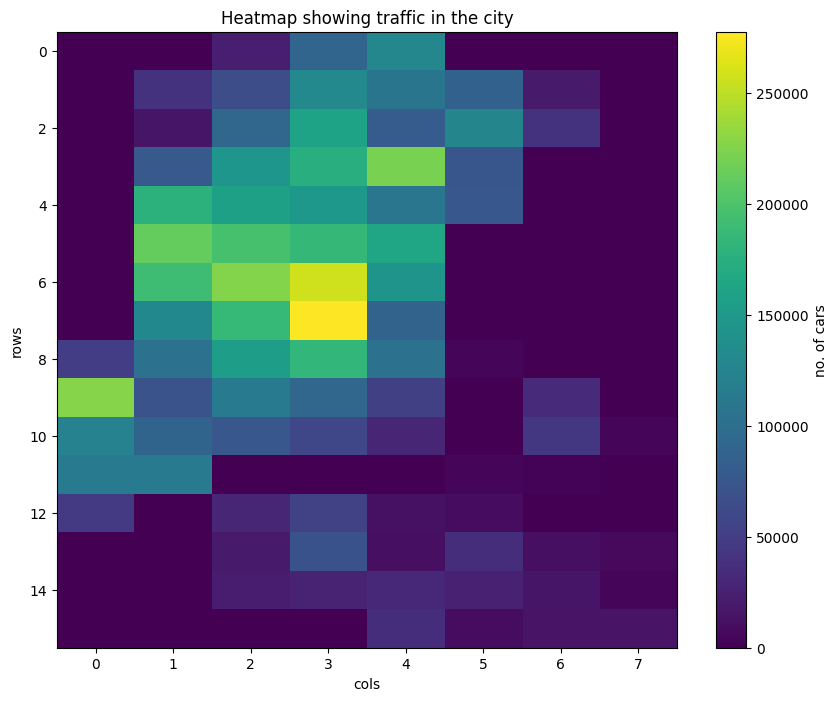

In [21]:
import numpy as np
dataset = "NYCBike1"
data_path = fr"D:\omer\ST-SSL\data\{dataset}\train.npz"
data = np.load(data_path)
y_train = data["y"]
train_avg = np.sum(y_train, axis=(0, 3)).squeeze(0).reshape(16, 8)

# inout_train_avg = (in_train_avg + out_train_avg)/2
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
plt.imshow(train_avg, cmap='viridis', aspect='auto')
plt.colorbar(label='no. of cars')
plt.title('Heatmap showing traffic in the city')
plt.xlabel('cols')
plt.ylabel('rows')
plt.show()

In [ ]:
with torch.no_grad():
    for i, (data, _) in enumerate(train_loader):
        data = data[:, 0, :, :].squeeze(1)
        B, N, D = data.size()
        data = data.view(B, args["rows"], args["cols"], D)
        plt.figure(figsize=(10, 8))
        plt.imshow(data[2, :, :, 1].cpu().numpy(), cmap='viridis', aspect='auto')
        plt.colorbar(label='no. of cars')
        plt.title('Heatmap showing traffic in the city')
        plt.xlabel('cols')
        plt.ylabel('rows')
        plt.show()

In [ ]:
import sys
sys.path.append('.')
sys.path.append('..')
from lib.dataloader import get_dataloader
import torch
import matplotlib.pyplot as plt

# start_epoch = args.start_epoch
# num_epochs = args.num_epochs

args = {"data_dir": r"data", "dataset": "NYCTaxi", "batch_size": 1, "test_batch_size": 32, "rows": 20, "cols": 10, "num_epochs": 100}
dataloader = get_dataloader(
    data_dir=args['data_dir'], 
    dataset=args['dataset'], 
    batch_size=args['batch_size'], 
    test_batch_size=args['test_batch_size'],
    scalar_type='Standard'
)
train_loader = dataloader['train']
test_loader = dataloader['test']
val_loader = dataloader['val']




!!Scaling is off!!


data['x_train'].shape:  (1912, 35, 200, 2) (1912, 1, 200, 2) 

!!train shuffle is false!!




# Heatmaps for citywide traffic

len(data_train): 3814
y_train.shape: (3814, 1, 1024, 2)
in_train.shape: (3814, 1, 1024)
in_train_avg.shape: (32, 32)


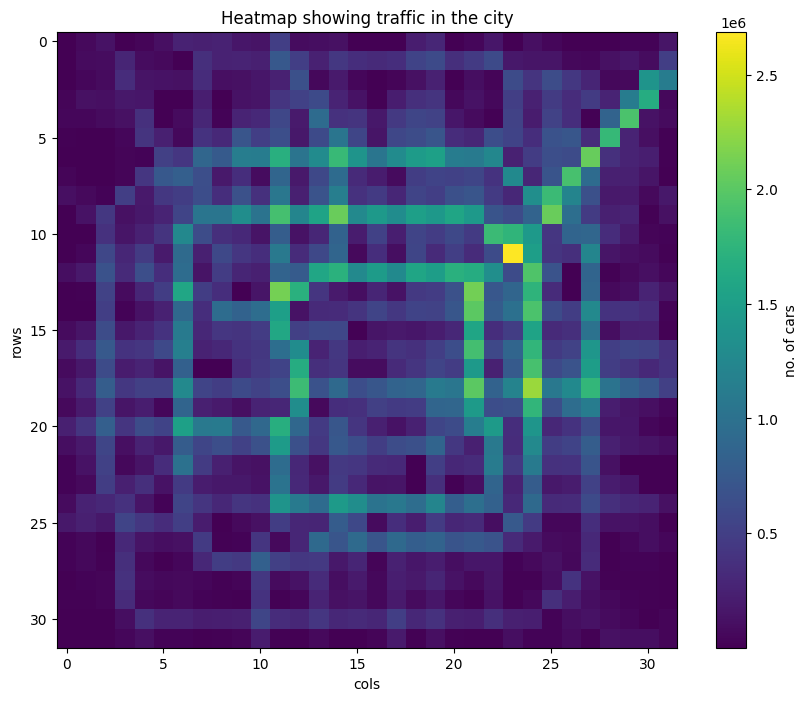

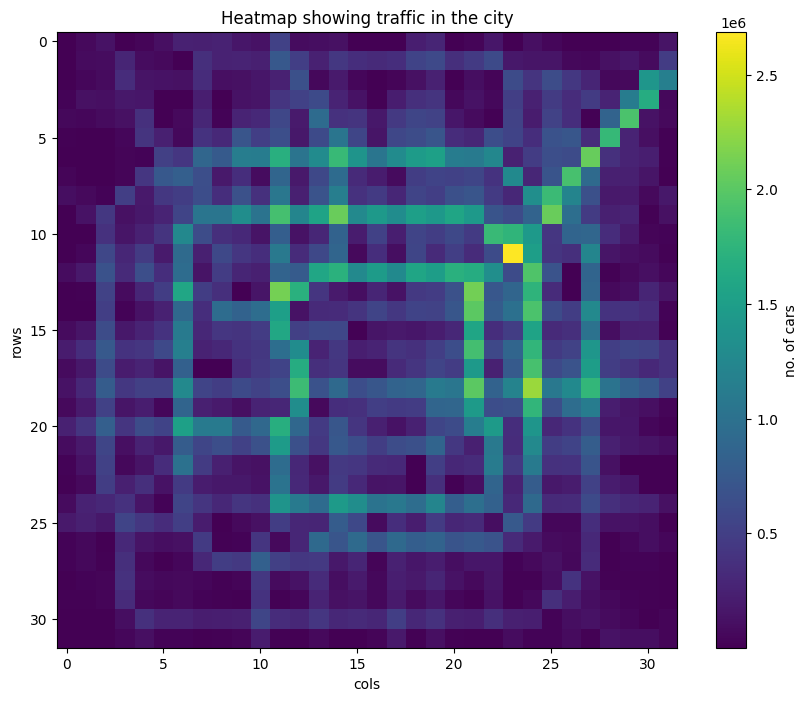

In [ ]:
import numpy as np
x_train = np.load(r'E:\estudy\ST-SSL\code\ST-SSL\data\BJTaxi\train.npz')["x"]
y_train = np.load(r'E:\estudy\ST-SSL\code\ST-SSL\data\BJTaxi\train.npz')["y"]
print(f"len(data_train): {len(x_train)}")
print(f"y_train.shape: {y_train.shape}")
in_train = y_train[:, :, :, 0]
out_train = y_train[:, :, :, 1]
print(f"in_train.shape: {in_train.shape}")
in_train_avg = np.sum(in_train, axis=0).squeeze(0).reshape(32, 32)
out_train_avg = np.sum(out_train, axis=0).squeeze(0).reshape(32, 32)
print(f"in_train_avg.shape: {in_train_avg.shape}")

inout_train_avg = (in_train_avg + out_train_avg)/2
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
plt.imshow(in_train_avg, cmap='viridis', aspect='auto')
plt.colorbar(label='no. of cars')
plt.title('Heatmap showing traffic in the city')
plt.xlabel('cols')
plt.ylabel('rows')
plt.show()
plt.figure(figsize=(10, 8))
plt.imshow(inout_train_avg, cmap='viridis', aspect='auto')
plt.colorbar(label='no. of cars')
plt.title('Heatmap showing traffic in the city')
plt.xlabel('cols')
plt.ylabel('rows')
plt.show()

inout_train_avg_pd.shape: (20, 10)


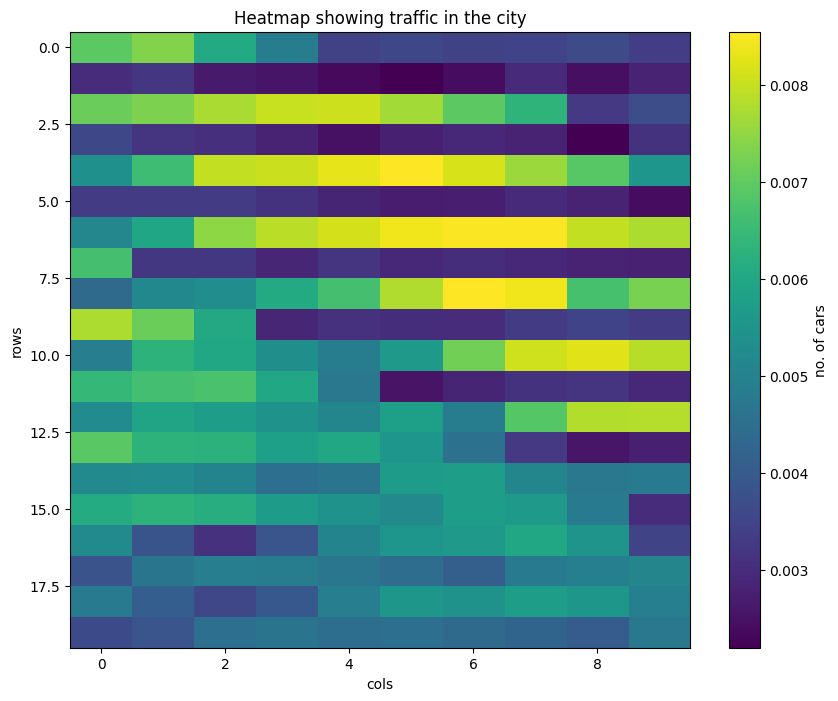

In [ ]:
in_train_avg_flat = in_train_avg.flatten()
inout_train_avg_pd = np.power(inout_train_avg, 0.1)
inout_train_avg_pd = inout_train_avg_pd/np.sum(inout_train_avg_pd, axis=(0, 1))

print(f"inout_train_avg_pd.shape: {inout_train_avg_pd.shape}")
# np.save(r'E:\estudy\ST-SSL\code\ST-SSL\data\NYCTaxi\grid_pd.npy', inout_train_avg_pd)
plt.figure(figsize=(10, 8))
plt.imshow(inout_train_avg_pd, cmap='viridis', aspect='auto')
plt.colorbar(label='no. of cars')
plt.title('Heatmap showing traffic in the city')
plt.xlabel('cols')
plt.ylabel('rows')
plt.show()

# visualizing the periodic and recent context

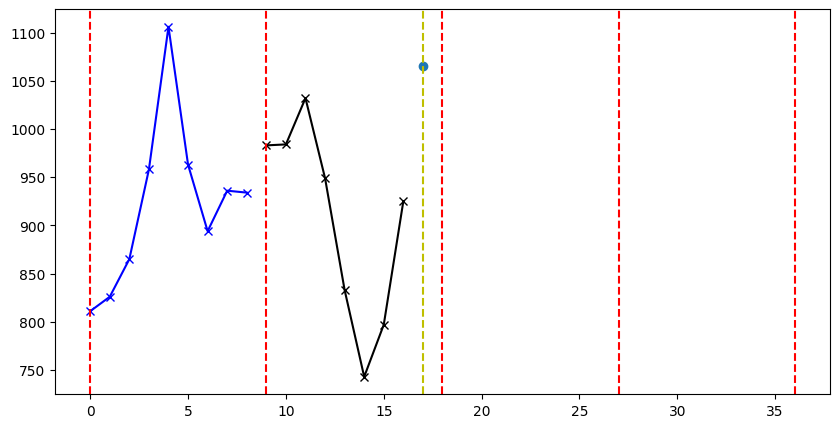

: 

In [37]:
import matplotlib.pyplot as plt
import numpy as np

x_train = np.load(r'D:\omer\ST-SSL\data\BJTaxi\train.npz')["x"]
y_train = np.load(r'D:\omer\ST-SSL\data\BJTaxi\train.npz')["y"]

# Preparing the data
in_train = x_train[:, -17:35, :, 0]
in_train_pred = y_train[:, :, :, 0]

# view1B = view1[:, :8, :, :]
# view1A = view1[:, 8:17, :, :]
# Plotting
plt.figure(figsize=(10, 5))  # Set figure size for better visibility
# Plot first 9 points in blue
node=375
sample = 370
plt.plot(in_train[sample, :9, node], "x-", color='blue')
# Plot last 8 points in black
plt.plot(range(9, 17), in_train[sample, 9:17, node], "x-", color='black')

# Plot prediction point with an 'o'
plt.plot(17, in_train_pred[sample, :, node], "o")

# Add vertical lines 9 samples apart and at index 17
for i in range(0, 37, 9):
    plt.axvline(x=i, color='r', linestyle='--')
plt.axvline(x=17, color='y', linestyle='--')

plt.show()
